In [1]:
%load_ext autoreload
%autoreload 2 

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

import pandas as pd
from sklearn.externals import joblib
from keras.models import load_model

from twitter_sentiment.model import TweetClassifier
from unboxer.attention_vis import AttentionVisualizer

PREP_FILEPATH = '/mnt/ml-team/homes/jakub.czakon/.unblackboxing_webinar_data/models/tweet_preprocessor.pkl'
ATTENTION_MODEL_FILEPATH = '/mnt/ml-team/homes/jakub.czakon/.unblackboxing_webinar_data/models/tweetnetAttention36.h5'

Using TensorFlow backend.


In [7]:
import pandas as pd

d = pd.read_csv('/mnt/ml-team/homes/jakub.czakon/.unblackboxing_webinar_data/data/tweets/Sentiment Analysis Dataset.csv',
               error_bad_lines=False)

In [13]:
d[d['Sentiment'] == 1]['SentimentText'].sample(200).values.tolist()[:4]

['sat with jo ',
 "@YoungQ Awww I'm sorry Rob. If I was there, I'd give them a piece of my mind for ya. ",
 '@stinggoddess its an awesome movie. i fail to see how that is a bad thing. and yes they were fine ',
 'Hi guys !! i just seen the new moon trail ^^ its the best  http://bit.ly/LL8dN    &lt;3']

In [2]:
tweet_preprocessor = joblib.load(PREP_FILEPATH)
tweet_classifier_attention = load_model(ATTENTION_MODEL_FILEPATH)

In [3]:
tweet_attention_vis = AttentionVisualizer(tweet_preprocessor, tweet_classifier_attention, 36)

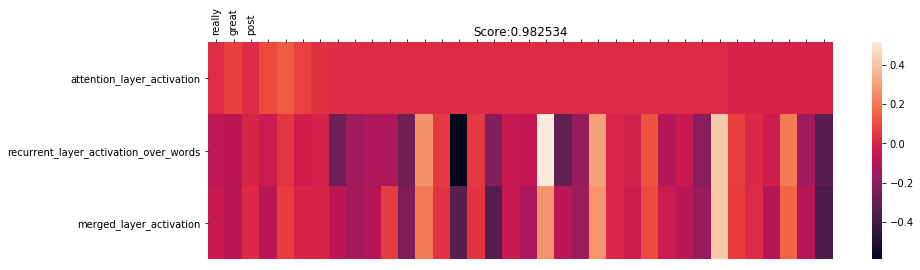

In [4]:
tweet = 'really great post' 
result = tweet_attention_vis.vis_activation([tweet])

In [6]:
tweet_attention_vis.type_and_vis();

interactive(children=(Text(value=u'This is a great tool', description=u'tweet'), Checkbox(value=False, description=u'grads'), Checkbox(value=True, description=u'activations'), Checkbox(value=True, description=u'over_words'), Checkbox(value=False, description=u'over_units'), Output()), _dom_classes=('widget-interact',))